In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

# Data loading and exploration

In [6]:
raw_data_dir = project_dir/'data/raw/render_results'

syms_dirs = list(raw_data_dir.glob('simulacao*'))

sym_dir = np.random.choice(syms_dirs)
img_fpath = np.random.choice(list(sym_dir.glob('*.png')))
img_fpath

PosixPath('/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao159/simulacao159_0021.png')

In [7]:
img = o3d.io.read_image(str(img_fpath))
img

Image of size 512x512, with 4 channels.
Use numpy.asarray to access buffer data.

In [8]:
img_data = np.asarray(img)
img_data.shape

(512, 512, 4)

/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao217/simulacao217_0061.png


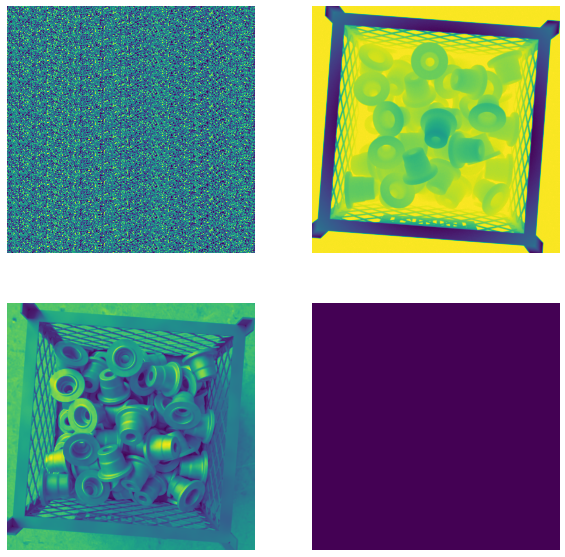

In [27]:
img_fpath = np.random.choice(list(raw_data_dir.glob('simulacao*/*.png')))
print(img_fpath)

img_data = np.asarray(o3d.io.read_image(str(img_fpath)))

fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(img_data[:,:,i])
    ax.set_axis_off()

fig.show()